In [5]:
import pandas as pd

interval = pd.read_csv('data/interval.csv')
interval.describe()

,mean,max,min
count,67.000000,67.000000,67.000000
mean,4488.813306,9254.462687,1610.835821
std,5351.650947,9040.267401,4138.645147
min,236.000000,246.000000,200.000000
25%,1001.066667,1765.500000,218.000000
50%,2747.666667,7329.000000,477.000000
75%,5873.791667,13826.500000,1324.500000
max,27542.000000,39690.000000,27542.000000


C:\Users\20591\AppData\Local\Temp\ipykernel_9320\849756618.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(data,


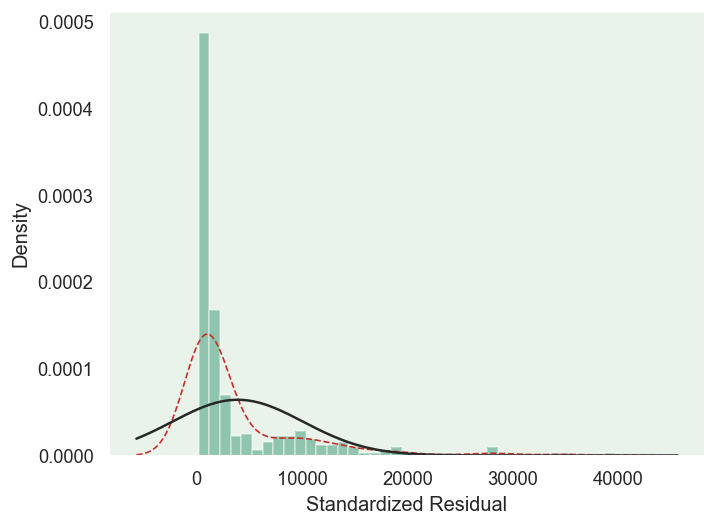

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

data = pd.read_csv('data/interval.csv')
data = list(data['interval'])
# data = [item for item in data if item < 10000]

sns.set_palette("hls")
#sns.set_style("whitegrid")
plt.figure(dpi=120)
sns.set(style='dark')
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"})
g = sns.distplot(data,
                 hist=True,
                 kde=True,  # 开启核密度曲线kernel density estimate (KDE)
                 kde_kws={'linestyle': '--', 'linewidth': '1', 'color': '#c72e29',
                          # 设置外框线属性
                          },
                 fit=norm,
                 color='#098154',
                 axlabel='Standardized Residual',  # 设置x轴标题

                 )

plt.show()

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

data = pd.read_csv('data/interval.csv')
data = list(data['interval'])
data = [item for item in data if item < 10000]

sns.set_palette("hls")
#sns.set_style("whitegrid")
plt.figure(dpi=120)
sns.set(style='dark')
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"})
g = sns.distplot(data,
                 hist=True,
                 kde=True,  # 开启核密度曲线kernel density estimate (KDE)
                 kde_kws={'linestyle': '--', 'linewidth': '1', 'color': '#c72e29',
                          # 设置外框线属性
                          },
                 fit=norm,
                 color='#098154',
                 axlabel='Standardized Residual',  # 设置x轴标题

                 )

plt.show()


C:\Users\20591\AppData\Local\Temp\ipykernel_9320\3325916600.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['interval'],shade=True)


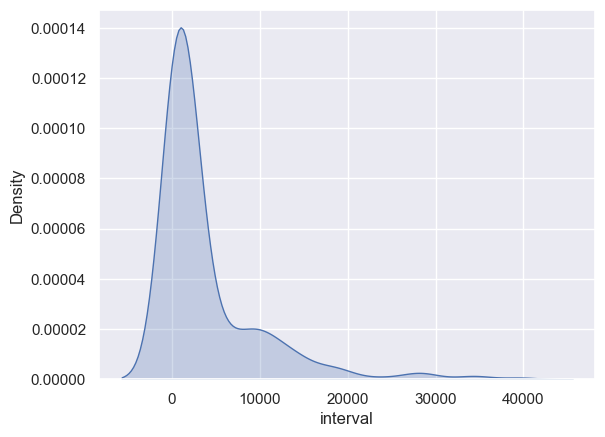

In [24]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
df = pd.read_csv('data/interval.csv')
# df = df[df['interval']<20000]
sns.kdeplot(df['interval'], shade=True)
plt.show()

In [ ]:
# 优秀被试
users = ['luqi', 'qxy', 'zhaoyifeng', 'ln']

# shiyubin，pwt（句子缺失）：单词很准，句子不准
# luzhouyang：单词不准，句子很准

# sentence level很显著 backward yyds

In [77]:
def select_raw_feature(data, exp_id: int, word: str, cols: list, window: int):
    index_list = data.loc[
        (data['word_watching'] == 1) & (data['experiment_id'] == exp_id) & (data['word'] == word)].index
    print(index_list)
    rows = []
    for index in index_list:
        tmp = [i for i in range(index - window, index + window) if 0 < i < max(data.index)]
        rows.extend(tmp)
    data1 = data.iloc[rows]
    data1 = data1[cols]
    return data1

In [31]:
import numpy as np
from scipy.stats import pearsonr


def compute_corr(filename: str, feature_of_word: list, feature_of_sentence: list, show_word: bool = True,
                 show_sentence: bool = True, show_wander: bool = True, user: list = None):
    pc_list = []
    num = 0
    data = pd.read_csv(filename)
    if user:
        data = data.loc[(data['word_watching'] == 1) & (data['user'].isin(user))]
    else:
        data = data.loc[(data['word_watching'] == 1)]
    print(f"有效数据数量{len(data)}条")
    num += len(data)
    if show_word:
        print("---------word_understand---------")
        for feature in feature_of_word:
            col_data = np.array(data[feature])
            word_understand = np.array(data['word_understand'])
            pc = pearsonr(col_data, word_understand)
            pc_list.append(pc[0])

    if show_sentence:
        print("\n---------sentence_understand---------")
        for feature in feature_of_sentence:
            col_data = np.array(data[feature])
            word_understand = np.array(data['sentence_understand'])
            pc = pearsonr(col_data, word_understand)
            pc_list.append(pc[0])

    if show_wander:
        print("\n---------mind_wandering---------")
        for feature in feature_of_sentence:
            col_data = np.array(data[feature])
            word_understand = np.array(data['mind_wandering'])
            pc = pearsonr(col_data, word_understand)
            pc_list.append(pc[0])
    return pc_list, num


In [89]:
feature_of_word = ['reading_times', 'number_of_fixations', 'fixation_duration', 'average_fixation_duration']
feature_of_sentence = ['second_pass_dwell_time_of_sentence', 'total_dwell_time_of_sentence',
                       'reading_times_of_sentence', 'saccade_times_of_sentence', 'forward_times_of_sentence',
                       'backward_times_of_sentence']
filename = 'dataset/all-user-2s.csv'
compute_corr(filename, feature_of_word, feature_of_sentence, show_word=True, show_sentence=False, show_wander=False,
             user=['pwt'])

有效数据数量763条
---------word_understand---------


([-0.14439626206219414,
  -0.2804354129983921,
  -0.3243906345833239,
  -0.16969853293528378],
 763)

In [51]:
feature_of_word = ['reading_times', 'number_of_fixations', 'fixation_duration', 'average_fixation_duration']
feature_of_sentence = ['second_pass_dwell_time_of_sentence', 'total_dwell_time_of_sentence',
                       'reading_times_of_sentence', 'saccade_times_of_sentence', 'forward_times_of_sentence',
                       'backward_times_of_sentence']
filename = 'dataset/all-user-2s.csv'

all_user = ['luqi', 'qxy', 'zhaoyifeng', 'ln', 'xuhailin', 'pwt', 'luzhouyang', 'chenyuwang', 'xuzhenyu', 'shiyubin',
            'czh', 'ys', 'zhaoguojie', 'wuyuting']
group1 = ['luqi', 'qxy', 'zhaoyifeng', 'ln']
group2 = ['xuhailin', 'pwt', 'luzhouyang', 'chenyuwang', 'xuzhenyu', 'shiyubin', 'czh', 'ys', 'zhaoguojie', 'wuyuting']
all_user, num_all = compute_corr(filename, feature_of_word, feature_of_sentence, show_sentence=False, show_wander=False,
                                 user=all_user)
group1, num1 = compute_corr(filename, feature_of_word, feature_of_sentence, show_sentence=False, show_wander=False,
                            user=group1)
group2, num2 = compute_corr(filename, feature_of_word, feature_of_sentence, show_sentence=False, show_wander=False,
                            user=group2)
print(group1)

有效数据数量7740条
---------word_understand---------
有效数据数量3365条
---------word_understand---------
有效数据数量4375条
---------word_understand---------
[-0.12509881322263267, -0.2253345031945833, -0.2253196527670048, -0.025698929929939465]


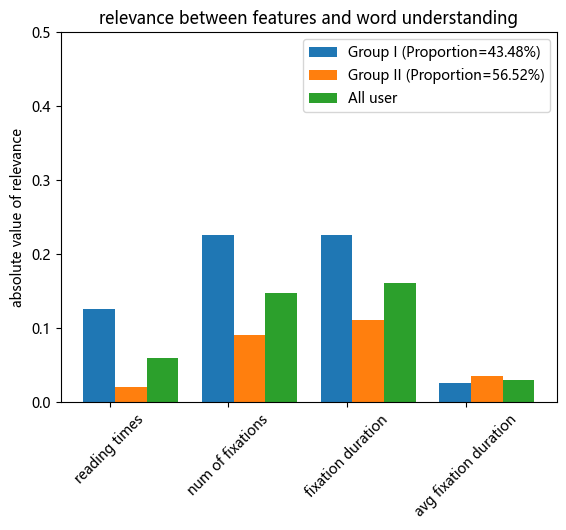

In [53]:
import matplotlib
import matplotlib.pyplot as plt

# {'understand': [337547, 95964, 19900, 315], 'not_understand': [60135, 24811, 16113, 15637]}
matplotlib.rc("font", family='MicroSoft YaHei')

group1 = list(map(abs, group1))
group2 = list(map(abs, group2))
list1 = np.array(group1)  # 柱状图第一组数据
list2 = np.array(group2)  # 柱状图第二组数据
list3 = np.array(all_user)  # 柱状图第二组数据
length = len(list1)
x = np.arange(length)  # 横坐标范围

list_par = ['reading times', 'num of fixations', 'fixation duration', 'avg fixation duration']

plt.figure()
total_width, n = 0.8, 3  # 柱状图总宽度，有几组数据
width = total_width / n  # 单个柱状图的宽度
x1 = x - width / 3  # 第一组数据柱状图横坐标起始位置
x2 = x1 + width  # 第二组数据柱状图横坐标起始位置
x3 = x2 + width

label1 = "Group I (Proportion=%.2f" % (num1 / num_all * 100) + "%)"
label2 = "Group II (Proportion=%.2f" % (num2 / num_all * 100) + "%)"
label3 = "All user"

# plt.xlabel("features")   # 纵坐标label
plt.ylabel("absolute value of relevance")  # 纵坐标label
plt.bar(x1, list1, width=width, label=label1)
plt.bar(x2, list2, width=width, label=label2)
plt.bar(x3, list3, width=width, label=label3)
plt.xticks(x, list_par, rotation=45)  # 用星期几替换横坐标x的值
plt.title("relevance between features and word understanding")
plt.legend()  # 给出图例
plt.ylim(0.0, 0.5)

plt.show()

In [54]:

feature_of_word = ['reading_times', 'number_of_fixations', 'fixation_duration', 'average_fixation_duration']
feature_of_sentence = ['second_pass_dwell_time_of_sentence', 'total_dwell_time_of_sentence',
                       'reading_times_of_sentence', 'saccade_times_of_sentence', 'forward_times_of_sentence',
                       'backward_times_of_sentence']
filename = 'dataset/all-user-2s.csv'

all_user = ['luqi', 'qxy', 'zhaoyifeng', 'ln', 'xuhailin', 'pwt', 'luzhouyang', 'chenyuwang', 'xuzhenyu', 'shiyubin',
            'czh', 'ys', 'zhaoguojie', 'wuyuting']
group1 = ['luqi', 'qxy', 'zhaoyifeng', 'ln']

group2 = ['xuhailin', 'pwt', 'luzhouyang', 'chenyuwang', 'xuzhenyu', 'shiyubin', 'czh', 'ys', 'zhaoguojie', 'wuyuting']
all_user, num_all = compute_corr(filename, feature_of_word, feature_of_sentence, show_word=False, show_sentence=True,
                                 show_wander=False,
                                 user=all_user)
group1, num1 = compute_corr(filename, feature_of_word, feature_of_sentence, show_word=False, show_sentence=True,
                            show_wander=False,
                            user=group1)
group2, num2 = compute_corr(filename, feature_of_word, feature_of_sentence, show_word=False, show_sentence=True,
                            show_wander=False,
                            user=group2)
print(group1)

有效数据数量7740条

---------sentence_understand---------
有效数据数量3365条

---------sentence_understand---------
有效数据数量4375条

---------sentence_understand---------
[0.0687423810851996, -0.45288651089738635, -0.45518747715071123, -0.3704087649249684, -0.31622861188059637, -0.3360604056047281]


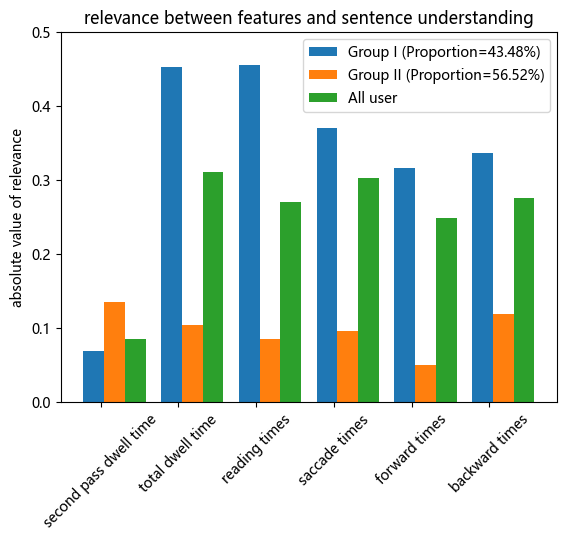

In [55]:

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", family='MicroSoft YaHei')
all_user = list(map(abs, all_user))
group1 = list(map(abs, group1))
group2 = list(map(abs, group2))
list1 = np.array(group1)  # 柱状图第一组数据
list2 = np.array(group2)  # 柱状图第二组数据
list3 = np.array(all_user)  # 柱状图第二组数据
length = len(list1)
x = np.arange(length)  # 横坐标范围

list_par = ['second pass dwell time', 'total dwell time',
            'reading times', 'saccade times', 'forward times',
            'backward times']

plt.figure()
total_width, n = 0.8, 3  # 柱状图总宽度，有几组数据
width = total_width / n  # 单个柱状图的宽度
x1 = x - width / 3  # 第一组数据柱状图横坐标起始位置
x2 = x1 + width  # 第二组数据柱状图横坐标起始位置
x3 = x2 + width

label1 = "Group I (Proportion=%.2f" % (num1 / num_all * 100) + "%)"
label2 = "Group II (Proportion=%.2f" % (num2 / num_all * 100) + "%)"
label3 = "All user"

# plt.xlabel("features")   # 纵坐标label
plt.ylabel("absolute value of relevance")  # 纵坐标label
plt.bar(x1, list1, width=width, label=label1)
plt.bar(x2, list2, width=width, label=label2)
plt.bar(x3, list3, width=width, label=label3)
plt.xticks(x, list_par, rotation=45)  # 用星期几替换横坐标x的值
plt.title("relevance between features and sentence understanding")
plt.legend()  # 给出图例
plt.ylim(0.0, 0.5)

plt.show()

In [73]:
def count_exp(data):
    exps = []
    for item in data:
        if item not in exps:
            exps.append(item)
    print(exps)
    return len(exps)


def count_user(data):
    user = []
    for item in data:
        if item not in user:
            user.append(item)
    print(user)

In [74]:
filename = 'dataset/all-user-2s.csv'

all_user = ['luqi', 'qxy', 'zhaoyifeng', 'ln', 'xuhailin', 'pwt', 'luzhouyang', 'chenyuwang', 'xuzhenyu', 'shiyubin',
            'czh', 'ys', 'zhaoguojie', 'wuyuting']
group1 = ['luqi', 'qxy', 'zhaoyifeng', 'ln']
group2 = ['shiyubin', 'czh', 'ys', 'chenyuwang', 'zhaoguojie', 'pwt', 'xuhailin', 'xuzhenyu', 'luzhouyang']

data = pd.read_csv(filename)

data = data.loc[(data['word_watching'] == 1) & (data['user'].isin(group2)) & (data['mind_wandering'] == 0)]
count_user(data['experiment_id'])

[574, 575, 578, 579, 585, 588, 590, 600, 601, 602, 603, 609, 610, 614, 615, 628, 636, 638, 639]


In [27]:
import pandas as pd

exp_list = [574, 575, 578, 579, 585, 588, 590, 600, 601, 602, 603, 609, 610, 614, 615, 628, 636, 638, 639]
cols = ['experiment_id', 'time', 'user', 'word', 'reading_times', 'number_of_fixations',
        'fixation_duration', ]
filename = 'dataset/2022-11-26-all.csv'

data = pd.read_csv(filename)
exp_id = 577
time = 19
words = ['grievance', 'provisions', 'difficulties', 'show']

index_list = data.loc[(data['experiment_id'] == exp_id) & (data['word'] == 'Wednesday') & (data['time'] == time)].index
print(index_list)
data1 = data.iloc[index_list]
data1 = data1[cols]

data1

Int64Index([70442], dtype='int64')


,experiment_id,time,user,word,reading_times,number_of_fixations,fixation_duration
70442,577,19,zhaoyifeng,Wednesday,2,4,938


In [17]:
import pandas as pd

dat = pd.read_csv('dataset/2022-11-26-all.csv')
dat = data.loc[(dat['experiment_id'] == 641) & (dat['time'] == 60)]

cols = ['word', 'fixation_duration']
dat = dat[cols]
dat = dat.sort_values("fixation_duration", ascending=False)[0:10]
dat

,word,fixation_duration
1726963,dismissal,2174
1726947,jobs,2123
1726799,personal,1885
1726853,premise,1842
1726852,The,1668
1726955,mediocrity,1595
1726909,constraining,1451
1726943,failure,1384
1726938,difference,1296
1726824,justified,1280


In [16]:
import pandas as pd

dat = pd.read_csv('dataset/2022-11-26-all.csv')
cols = ['word_watching', 'experiment_id', 'time', 'user', 'word', 'reading_times', 'number_of_fixations',
        'fixation_duration', ]
index_list = dat.loc[
    (dat['experiment_id'] == 641) & (dat['word'] == 'Consequently') & (dat['word_watching'] == 1)].index
data1 = dat.iloc[index_list]
data1 = data1[cols]
data1

,word_watching,experiment_id,time,user,word,reading_times,number_of_fixations,fixation_duration


In [3]:
import pandas as pd

dat = pd.read_csv('dataset/2022-11-26-all.csv')

index_list = []
experiment_id = dat['experiment_id'][0]
for index, row in dat.iterrows():
    if row['experiment_id'] != experiment_id:
        index_list.append(index - 1)
        experiment_id = row['experiment_id']
print(index_list)

[44549, 65456, 90512, 142904, 166928, 202557, 232016, 285116, 316022, 389726, 426070, 448255, 464805, 489373, 542953, 583801, 609261, 625443, 660842, 727020, 742473, 779711, 818222, 854874, 887179, 920553, 956281, 998141, 1031559, 1066632, 1133972, 1169294, 1267483, 1336720, 1451835, 1492537, 1531630, 1582170, 1702437]


In [4]:
def get_complete_gaze_data_index(dat):
    list = []
    experiment_id = dat['experiment_id'][0]
    for index, row in dat.iterrows():
        if row['experiment_id'] != experiment_id:
            list.append((row['experiment_id'], dat['time'][index - 1]))
            experiment_id = row['experiment_id']
    return list

In [5]:
import pandas as pd

dat = pd.read_csv('dataset/2022-11-26-all.csv')
list = get_complete_gaze_data_index(dat)
list

[(575, 98),
 (577, 68),
 (578, 95),
 (579, 117),
 (580, 77),
 (585, 78),
 (586, 88),
 (587, 117),
 (588, 101),
 (590, 165),
 (591, 117),
 (596, 84),
 (597, 49),
 (598, 82),
 (600, 140),
 (601, 91),
 (602, 66),
 (603, 61),
 (605, 90),
 (609, 162),
 (610, 50),
 (614, 85),
 (615, 98),
 (617, 118),
 (618, 70),
 (619, 73),
 (622, 87),
 (623, 91),
 (624, 76),
 (625, 80),
 (628, 147),
 (630, 86),
 (631, 168),
 (636, 146),
 (637, 252),
 (638, 93),
 (639, 82),
 (640, 132),
 (641, 206)]

In [9]:
import os

path = "dataset/all-gaze.csv"
for item in list:
    dat1 = dat.loc[(dat['experiment_id'] == item[0]) & (dat['time'] == item[1])]
    if os.path.exists(path):
        dat1.to_csv(path, index=False, mode="a", header=False)
    else:
        dat1.to_csv(path, index=False, mode="a")



In [11]:
import pandas as pd

data = pd.read_csv('dataset/2022-11-26-all.csv')
dat_watching = data.loc[(data['word_watching'] == 1) & (data['user'] == 'luqi')]
cols = ['user', 'sentence_understand', 'backward_times_of_sentence']
dat_sen_understand = dat_watching.loc[data['sentence_understand'] == 1][cols]
dat_sen_not_understand = dat_watching.loc[data['sentence_understand'] == 0][cols]

print(dat_sen_understand.describe())
print(dat_sen_not_understand.describe())

       sentence_understand  backward_times_of_sentence
count               1602.0                 1602.000000
mean                   1.0                    0.332634
std                    0.0                    0.357357
min                    1.0                    0.000000
25%                    1.0                    0.000000
50%                    1.0                    0.300102
75%                    1.0                    0.538565
max                    1.0                    2.055593
       sentence_understand  backward_times_of_sentence
count                899.0                  899.000000
mean                   0.0                    0.787022
std                    0.0                    0.634260
min                    0.0                    0.000000
25%                    0.0                    0.306928
50%                    0.0                    0.667616
75%                    0.0                    1.082021
max                    0.0                    2.583762


In [23]:

# data.describe()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'d'}>]], dtype=object)

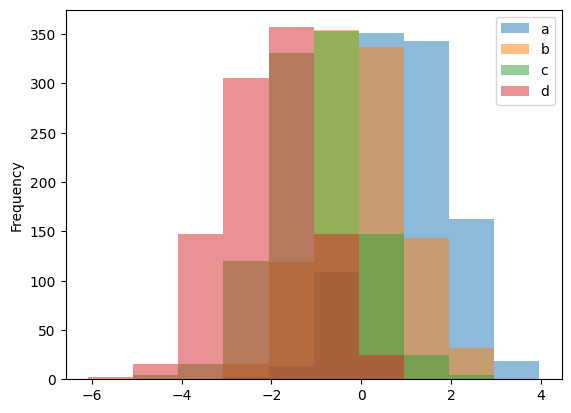

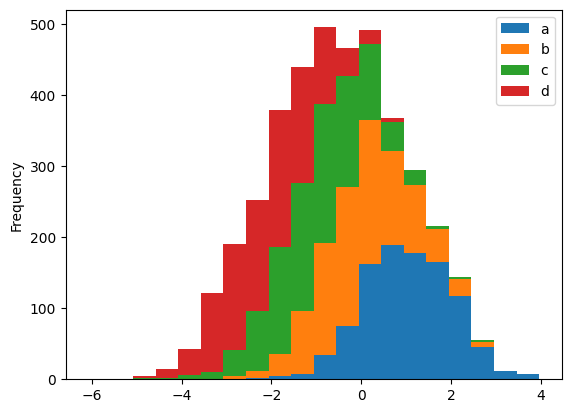

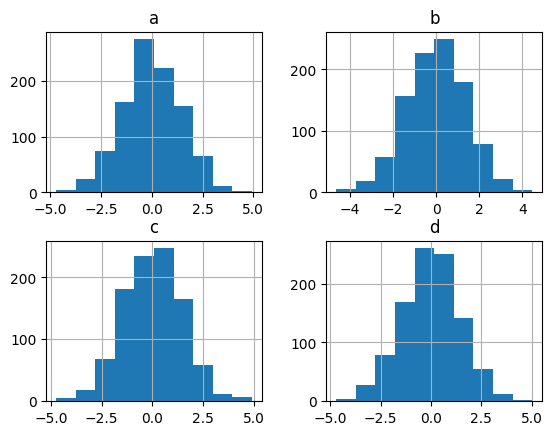

In [19]:
#构建数据集
import numpy as np

df4 = pd.DataFrame({
    "a": np.random.randn(1000) + 1,
    "b": np.random.randn(1000),
    "c": np.random.randn(1000) - 1,
    "d": np.random.randn(1000) - 2,
}, columns=['a', 'b', 'c', 'd'])
df4
df4.plot.hist(alpha=0.5)  #指定图形透明度
df4.plot.hist(stacked=True, bins=20)  #堆叠并指定箱数为20
df4.diff().hist()  #通过diff给每一列数据都绘制一个直方图

array([[<AxesSubplot:title={'center':'understand'}>,
        <AxesSubplot:title={'center':'not_understand'}>]], dtype=object)

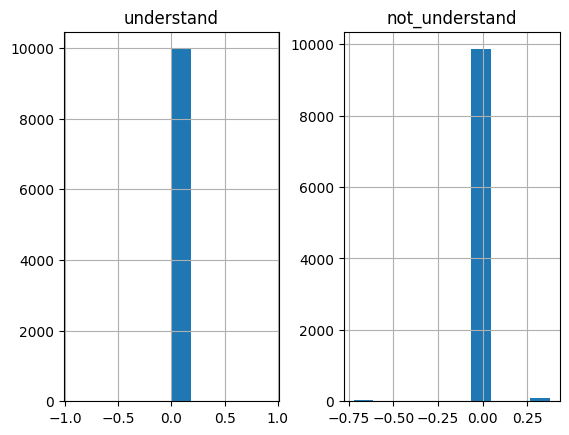

In [38]:
data = pd.read_csv('dataset/2022-11-26-all.csv')
# data = data['backward_times_of_sentence']
understand = data.loc[data['sentence_understand'] == 1]['backward_times_of_sentence'].to_list()
not_understand = data.loc[data['sentence_understand'] == 0]['backward_times_of_sentence'].to_list()

import numpy as np

df4 = pd.DataFrame({
    "understand": understand[0:10000],
    "not_understand": not_understand[0:10000]
}, columns=['understand', 'not_understand'])
# df4.plot.hist(alpha=0.5)  #指定图形透明度
# df4.plot.hist(stacked=True,bins=20) #堆叠并指定箱数为20
df4.diff().hist()  #通过diff给每一列数据都绘制一个直方图

In [34]:
data = pd.read_csv('dataset/2022-11-26-all.csv')
dat = data.loc[(data['user'] == 'qxy') & (data['saccade_times_of_sentence'] > 0)]
dat_sen_understand = dat[dat['sentence_understand'] == 1]
dat_sen_not_understand = dat[dat['sentence_understand'] == 0]

print(dat_sen_understand['backward_times_of_sentence'].describe())
print(dat_sen_not_understand['backward_times_of_sentence'].describe())

count    42960.000000
mean         0.094092
std          0.144242
min          0.000000
25%          0.000000
50%          0.000000
75%          0.261189
max          0.679247
Name: backward_times_of_sentence, dtype: float64
count    8839.000000
mean        0.375939
std         0.302625
min         0.000000
25%         0.000000
50%         0.318929
75%         0.783568
max         0.783568
Name: backward_times_of_sentence, dtype: float64


In [35]:

data = pd.read_csv('dataset/2022-11-26-all.csv')
dat = data.loc[(data['user'] == 'luqi') & (data['saccade_times_of_sentence'] > 0)]
dat_sen_understand = dat[dat['sentence_understand'] == 1]
dat_sen_not_understand = dat[dat['sentence_understand'] == 0]

print(dat_sen_understand['backward_times_of_sentence'].describe())
print(dat_sen_not_understand['backward_times_of_sentence'].describe())

count    172148.000000
mean          0.467882
std           0.399824
min           0.000000
25%           0.249543
50%           0.352956
75%           0.629316
max           2.055593
Name: backward_times_of_sentence, dtype: float64
count    59948.000000
mean         1.282491
std          0.807674
min          0.000000
25%          0.645940
50%          1.037929
75%          1.763095
max          2.583762
Name: backward_times_of_sentence, dtype: float64


In [36]:


data = pd.read_csv('dataset/2022-11-26-all.csv')
dat = data.loc[(data['user'] == 'czh') & (data['saccade_times_of_sentence'] > 0)]
dat_sen_understand = dat[dat['sentence_understand'] == 1]
dat_sen_not_understand = dat[dat['sentence_understand'] == 0]

print(dat_sen_understand['backward_times_of_sentence'].describe())
print(dat_sen_not_understand['backward_times_of_sentence'].describe())


count    60171.000000
mean         0.307135
std          0.302841
min          0.000000
25%          0.000000
50%          0.286000
75%          0.522379
max          1.242670
Name: backward_times_of_sentence, dtype: float64
count    1440.000000
mean        0.552079
std         0.088988
min         0.291207
25%         0.582413
50%         0.582413
75%         0.582413
max         0.582413
Name: backward_times_of_sentence, dtype: float64


In [37]:



data = pd.read_csv('dataset/2022-11-26-all.csv')
dat = data.loc[(data['user'] == 'shiyubin') & (data['saccade_times_of_sentence'] > 0)]
dat_sen_understand = dat[dat['sentence_understand'] == 1]
dat_sen_not_understand = dat[dat['sentence_understand'] == 0]

print(dat_sen_understand['backward_times_of_sentence'].describe())
print(dat_sen_not_understand['backward_times_of_sentence'].describe())



count    38092.000000
mean         0.253022
std          0.228553
min          0.000000
25%          0.000000
50%          0.291207
75%          0.314658
max          0.920783
Name: backward_times_of_sentence, dtype: float64
count    2021.000000
mean        0.302076
std         0.165475
min         0.000000
25%         0.345976
50%         0.345976
75%         0.345976
max         0.721348
Name: backward_times_of_sentence, dtype: float64


In [13]:
# reweight数据集
import pandas as pd

data = pd.read_csv('dataset/2022-11-26-all.csv')

dat = data.loc[data['word_watching'] == 1]['number_of_fixations']

num_of_fixation_list = [0 for i in range(18)]
for index, row in dat.iteritems():
    num_of_fixation_list[row - 1] += 1

print(num_of_fixation_list)

[4065, 2397, 1105, 449, 238, 112, 54, 26, 20, 6, 3, 2, 1, 0, 0, 0, 1, 1]


C:\Users\20591\AppData\Local\Temp\ipykernel_23680\1075346416.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in dat.iteritems():


In [14]:
sum_num = sum(num_of_fixation_list)
now_sum = 0
for i, num in enumerate(num_of_fixation_list):
    now_sum += num
    print(f"number of fixations:{i + 1} 之下占比为{now_sum / sum_num}")

number of fixations:1 之下占比为0.4793632075471698
number of fixations:2 之下占比为0.7620283018867925
number of fixations:3 之下占比为0.8923349056603773
number of fixations:4 之下占比为0.9452830188679245
number of fixations:5 之下占比为0.9733490566037736
number of fixations:6 之下占比为0.9865566037735849
number of fixations:7 之下占比为0.9929245283018868
number of fixations:8 之下占比为0.9959905660377358
number of fixations:9 之下占比为0.9983490566037736
number of fixations:10 之下占比为0.9990566037735849
number of fixations:11 之下占比为0.9994103773584906
number of fixations:12 之下占比为0.9996462264150944
number of fixations:13 之下占比为0.9997641509433962
number of fixations:14 之下占比为0.9997641509433962
number of fixations:15 之下占比为0.9997641509433962
number of fixations:16 之下占比为0.9997641509433962
number of fixations:17 之下占比为0.9998820754716982
number of fixations:18 之下占比为1.0


In [20]:

import pandas as pd

data = pd.read_csv('dataset/2022-11-26-all.csv')
data_watching = data.loc[data['word_watching'] == 1]

cols = ["total_dwell_time_of_sentence", "sentence_understand"]
data_select = data_watching[cols]
data_train = data['total_dwell_time_of_sentence']
data_train

0             0.000000
1             0.000000
2             0.000000
3             0.000000
4             0.000000
              ...     
1757649    2151.733198
1757650    2151.733198
1757651    2151.733198
1757652    2151.733198
1757653    2151.733198
Name: total_dwell_time_of_sentence, Length: 1757654, dtype: float64

In [23]:
from sklearn.mixture import GaussianMixture
import numpy as np

data_train = np.array(data_train)
data_train = data_train.reshape(-1, 1)
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(data_train)


GaussianMixture(n_components=2, random_state=0)

In [24]:

pre_target = gmm.predict(data_train)
pre_target

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [7]:
import pandas as pd

data = pd.read_csv("dataset/2022-11-26-all.csv")
data['backward_times_of_sentence'].describe()
dat_back_under_5 = data.loc[(data['backward_times_of_sentence'] < 5) & (data['backward_times_of_sentence'] > 0)]
dat_back_under_5_understand = dat_back_under_5.loc[data['sentence_understand'] == 1]
dat_back_under_5_not_understand = dat_back_under_5.loc[data['sentence_understand'] == 0]
feature_of_sentence = ['second_pass_dwell_time_of_sentence', 'total_dwell_time_of_sentence',
                       'reading_times_of_sentence', 'saccade_times_of_sentence', 'forward_times_of_sentence',
                       'backward_times_of_sentence']

In [8]:
dat_back_under_5_understand[feature_of_sentence].describe()

,second_pass_dwell_time_of_sentence,total_dwell_time_of_sentence,reading_times_of_sentence,saccade_times_of_sentence,forward_times_of_sentence,backward_times_of_sentence
count,453726.000000,453726.000000,453726.000000,453726.000000,453726.000000,453726.000000
mean,983.203480,3562.593981,0.869798,1.402098,0.839862,0.562236
std,1177.630425,2525.684947,0.549470,0.881195,0.727354,0.337262
min,0.000000,0.000000,0.000000,0.215313,0.000000,0.215313
25%,83.705358,2028.987110,0.538565,0.763004,0.296974,0.296974
50%,616.617702,2983.245736,0.721348,1.154156,0.656917,0.389871
75%,1467.509396,4400.361736,1.116221,1.913574,1.358493,0.721348
max,6089.554637,14069.659815,4.005698,5.860162,4.185830,2.055593


In [9]:

dat_back_under_5_not_understand[feature_of_sentence].describe()

,second_pass_dwell_time_of_sentence,total_dwell_time_of_sentence,reading_times_of_sentence,saccade_times_of_sentence,forward_times_of_sentence,backward_times_of_sentence
count,116696.000000,116696.000000,116696.000000,116696.000000,116696.000000,116696.000000
mean,2026.927764,5303.802820,0.945043,2.342133,1.426641,0.915492
std,2841.628998,2768.680857,0.640070,1.617527,1.053019,0.723995
min,0.000000,54.904939,0.215313,0.215313,0.000000,0.215313
25%,83.452050,3286.888487,0.522379,1.044757,0.522379,0.318929
50%,920.411695,4733.208611,0.850735,2.075858,1.154156,0.621335
75%,2329.074002,7849.090474,1.213652,3.106675,2.154260,1.253452
max,9771.141359,11356.988988,3.069608,5.813464,3.815022,2.583762


In [4]:
import pandas as pd

data = pd.read_csv('dataset/all-gaze.csv')
feature_of_word = ['reading_times', 'number_of_fixations', 'fixation_duration', 'average_fixation_duration',
                   'word_understand']
dat = data[feature_of_word]
dat.to_csv('dataset/word_dataset.csv')

In [4]:
import pandas as pd

data = pd.read_csv('dataset/2022-12-11-test-chenyuwang-all.csv')
sentence_test_data = data.sample(frac=0.2, replace=False)
sentence_train_data = data.drop(labels=sentence_test_data.index)

cnt = 0
for index1, row1 in sentence_train_data.iterrows():
    for index2, row2 in sentence_test_data.iterrows():
        cnt += 1
        if cnt > 1000:
            break
        if index1 == index2:
            assert 1 > 2
sentence_train_data.to_csv('dataset/word_train_data_chenyuwang.csv', index=False)
sentence_test_data.to_csv('dataset/word_test_data_chenyuwang.csv', index=False)
len(sentence_train_data), len(sentence_test_data)

(848, 212)

In [ ]:
import pandas as pd

csv = pd.read_csv('dataset/all-gaze.csv')

In [ ]:
def draw_gaussian_person(counts_dict, rows, cols):
    from scipy.optimize import curve_fit
    import math
    import matplotlib.mlab as mlab
    from scipy.stats import norm
    from matplotlib.pyplot import MultipleLocator

    mu_list = []
    sigma_list = []
    num = 0
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 6, rows * 4), constrained_layout=True)
    num_bins = [i * 100 for i in range(51)]
    for k, counts in counts_dict.items():
        user = k
        row = int(num / cols)
        col = num - cols * (row)
        # print('row: ' + str(row))
        # print('col: ' + str(col))
        weight = []
        for i in range(len(counts)):
            weight.append(len(counts[i]) / len(counts[0] + counts[1]))
        # print(weight)
        ax2 = ax[row, col].twinx()
        for i in range(len(counts)):
            x = np.array(counts_dict[k][i])
            # n, bins, patches = ax[row, col].hist(x, 20, density=1, facecolor='blue', alpha=0.75)  #第二个参数是直方图柱子的数量
            mu = np.mean(x)  #计算均值
            sigma = np.std(x)
            mu_list.append(mu)
            sigma_list.append(sigma)
            # num_bins = 50 #直方图柱子的数量
            if i == 0:
                n, bins, patches = ax[row, col].hist(x, num_bins, density=0, alpha=0.8, color='pink',
                                                     label='understand real')
            else:
                n, bins, patches = ax[row, col].hist(x, num_bins, density=0, alpha=0.6, color='skyblue',
                                                     label='not understand real')
            y = norm.pdf(bins, mu, sigma) * weight[i]  #拟合一条最佳正态分布曲线y
            print(y)
            ax[row, col].grid(True)
            if i == 0:
                ax2.plot(bins, y, 'r-', label='understand gaussian')  #绘制y的曲线
            else:
                ax2.plot(bins, y, 'b-', label='not understand gaussian')  #绘制y的曲线

        ax[row, col].set_xlabel('values')  #绘制x轴
        ax[row, col].set_ylabel('Frequency')  #绘制y轴
        ax2.set_ylabel('Probability')
        ax2.set_ylim(0, 0.0015)

In [19]:
cols = ['experiment_id', 'number_of_fixations', 'reading_times']

In [80]:
# 查找需要检查的id
import pandas as pd

word = 'incompetently'
cols = ['experiment_id', 'user', 'word', 'number_of_fixations', 'reading_times']

data = pd.read_csv('dataset/2022-11-26-all.csv')
data = data.loc[(data['word'] == word) & (data['number_of_fixations'] >= 7)]
data[cols]

,experiment_id,user,word,number_of_fixations,reading_times
658478,603,zhaoguojie,incompetently,7,3
658867,603,zhaoguojie,incompetently,8,4
659256,603,zhaoguojie,incompetently,8,4
659645,603,zhaoguojie,incompetently,7,3
660034,603,zhaoguojie,incompetently,7,3
660423,603,zhaoguojie,incompetently,7,3
660812,603,zhaoguojie,incompetently,7,3


In [81]:
# 检查新生成的特征的数量
import pandas as pd

word = 'incompetently'
experiment_id = 603
cols = ['user', 'word', 'number_of_fixations', 'reading_times']

data = pd.read_csv('dataset/2022-11-30-test-all.csv')
data = data.loc[(data['word'] == word) & (data['number_of_fixations'] > 0)]
data[cols]

,user,word,number_of_fixations,reading_times
85916,zhaoguojie,incompetently,2,1
86305,zhaoguojie,incompetently,2,1
86694,zhaoguojie,incompetently,2,1
87083,zhaoguojie,incompetently,4,2
87472,zhaoguojie,incompetently,4,2
87861,zhaoguojie,incompetently,4,2
88250,zhaoguojie,incompetently,7,3
88639,zhaoguojie,incompetently,8,4
89028,zhaoguojie,incompetently,8,4
89417,zhaoguojie,incompetently,8,4


In [103]:
# 检查对应的fixation的标号
import pandas as pd

page_id = 1015
word = 'incompetently'
fix_index = 217
data = pd.read_csv('dataset/fix-word-map.csv')
data.loc[(data['page_id'] == page_id) & (data['word'] == word)]
data.loc[(data['page_id'] == page_id) & (data['fix_index'] == fix_index)]

,word,fix_index,page_id
561,animal,217,1015


In [1]:
import pandas as pd

word = 'temperature'
exp_id = 588
step_1 = pd.read_csv('dataset/step-1.csv')
step_1.loc[(step_1['word'] == word) & (step_1['experiment_id'] == exp_id)]

,experiment_id,user,word,word_understand,reading_times,number_of_fixations,fixation_duration
4718,588,chenyuwang,temperature,1,5,9,2298


In [4]:
import pandas as pd

data = pd.read_csv('dataset/handcraft-data.csv')
data = data[data['experiment_id'] == 588]
data.to_csv('tmp.csv',index=False)